## SET11121 002 - Data Wrangling

### Importing modules

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

### Loading the dataset

In [136]:
df = pd.read_csv(r"C:\Users\disha\Downloads\bike_sharing_dataset\hour.csv")

We will be using hour.csv as our dataset because the only difference between day.csv and hour.csv is that day.csv doesn't have the hr column.

#### Displaying the dataset

In [143]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Question 1

### Create a dataframe for the following information:

#### 1)  average counts for 2011 across months and seasons

Filter data to show only records from the year 2011

In [125]:
df_2011 = df[df['yr']==0]
df_2011

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,1,0,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92
8641,8642,2011-12-31,1,0,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71
8642,8643,2011-12-31,1,0,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52
8643,8644,2011-12-31,1,0,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38


Calculate the average count for each month

In [88]:
monthly_average = df_2011.groupby('mnth').agg({'cnt': 'mean'})

Define the seasons and map for each month to a season

In [89]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 
           11: 'Fall', 12: 'Winter'}
df_2011['season'] = df_2011['mnth'].map(seasons)

Calculate the average count for each season

In [90]:
seasonal_average = df_2011.groupby('season').agg({'cnt': 'mean'})

Displaying the average counts across months and seasons

In [91]:
monthly_average

,cnt
mnth,
1,55.507267
2,74.291217
3,87.732877
4,131.947149
5,182.555108
6,199.322222
7,189.974462
8,186.991792
9,177.709902


In [9]:
seasonal_average

,cnt
season,
Fall,162.044975
Spring,134.398541
Summer,192.047380
Winter,83.602984


#### 2)  average counts for 2012 across months and seasons

Filter data to show only records from the year 2012

In [92]:
df_2012 = df[df['yr']==1]
df_2012

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
8648,8649,2012-01-01,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
8649,8650,2012-01-01,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Calculate the average count for each month

In [93]:
monthly_average = df_2012.groupby('mnth').agg({'cnt': 'mean'})

Define the seasons and map for each month to a season

In [94]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 
           11: 'Fall', 12: 'Winter'}
df_2012['season'] = df_2012['mnth'].map(seasons)

Displaying the average count across months and seasons

In [95]:
monthly_average

,cnt
mnth,
1,130.558704
2,149.041908
3,221.904441
4,242.651811
5,263.259409
6,281.708333
7,273.665323
8,288.310484
9,303.573611


In [96]:
seasonal_average

,cnt
season,
Fall,162.044975
Spring,134.398541
Summer,192.047380
Winter,83.602984


### Question-2

#### 2. Create a DataFrame that shows the difference between average counts of each month in 2011 and 2012 with and without holidays.


#### Average counts of each month in 2011 with and without holidays

Create a pivot table with year and month as index, holiday as columns, and count as values

In [97]:
table_2011 = df_2011.pivot_table(index=['yr', 'mnth'], columns='holiday', values='cnt', aggfunc='mean')

Calculate the difference between average counts with and without holidays

In [98]:
table_2011['difference'] = table_2011[0] - table_2011[1]

Reset index to make 'year' and 'month' columns

In [99]:
table_2011 = table_2011.reset_index()

In [100]:
print(table_2011)

holiday  yr  mnth           0           1  difference
0         0     1   56.007530   41.666667   14.340863
1         0     2   75.372800   46.125000   29.247800
2         0     3   87.732877         NaN         NaN
3         0     4  132.005755  130.250000    1.755755
4         0     5  182.948611  170.750000   12.198611
5         0     6  199.322222         NaN         NaN
6         0     7  187.913889  251.791667  -63.877778
7         0     8  186.991792         NaN         NaN
8         0     9  179.028860  139.625000   39.403860
9         0    10  164.664812  213.208333  -48.543521
10        0    11  145.013413  101.312500   43.700913
11        0    12  119.785515   57.260870   62.524646


#### Average counts of each month in 2012 with and without holidays

Similarly for the year 2012

In [101]:
table_2012 = df_2012.pivot_table(index=['yr', 'mnth'], columns='holiday', values='cnt', aggfunc='mean')

In [102]:
table_2012['difference'] = table_2012[0] - table_2012[1]

In [103]:
table_2012 = table_2012.reset_index()

In [104]:
print(table_2012)

holiday  yr  mnth           0           1  difference
0         1     1  133.278098   90.404255   42.873843
1         1     2  149.488789  136.043478   13.445311
2         1     3  221.904441         NaN         NaN
3         1     4  241.864553  265.416667  -23.552113
4         1     5  263.641667  251.791667   11.850000
5         1     6  281.708333         NaN         NaN
6         1     7  272.505556  308.458333  -35.952778
7         1     8  288.310484         NaN         NaN
8         1     9  305.372126  251.416667   53.955460
9         1    10  282.694444  228.250000   54.444444
10        1    11  214.880597  181.125000   33.755597
11        1    12  170.653686   44.043478  126.610207


### Question 3

#### For every year, find which season had the highest count of total rental bikes, with casual and registered users separately;


#### For the year 2011

Group the data by season and calculate the sum of casual, registered, and cnt

In [105]:
grouped = df_2011.groupby('season').sum()

Find the season with the highest sum of casual rentals

In [106]:
highest_casual_season = grouped['casual'].idxmax()
print("Season with highest sum of casual rentals: ", highest_casual_season)

Season with highest sum of casual rentals:  Summer


Find the season with the highest sum of registered rentals

In [107]:
highest_registered_season = grouped['registered'].idxmax()
print("Season with highest sum of registered rentals: ", highest_registered_season)

Season with highest sum of registered rentals:  Summer


Find the season with the highest sum of total rentals

In [108]:
highest_cnt_season = grouped['cnt'].idxmax()
print("Season with highest sum of total rentals: ", highest_cnt_season)

Season with highest sum of total rentals:  Summer


#### Similarly for 2012

In [109]:
grouped_2012 = df_2012.groupby('season').sum()

In [110]:
highest_casual_season_2012 = grouped_2012['casual'].idxmax()
print("Season with highest sum of casual rentals: ", highest_casual_season_2012)

Season with highest sum of casual rentals:  Summer


In [111]:
highest_registered_season_2012 = grouped_2012['registered'].idxmax()
print("Season with highest sum of registered rentals: ", highest_registered_season_2012)

Season with highest sum of registered rentals:  Summer


In [112]:
highest_cnt_season_2012 = grouped_2012['cnt'].idxmax()
print("Season with highest sum of total rentals: ", highest_cnt_season_2012)

Season with highest sum of total rentals:  Summer


### Question 4

#### For every year, find the top 3 months with the lowest number of count of total rental bikes with casual and registered users separately


#### For the year 2011

In [115]:
# Group the data by year and month, and sum the casual and registered columns
group2_2011 = df_2011.groupby(['yr', 'mnth'], as_index=False).sum()[['yr', 'mnth', 'casual', 'registered']]

# Find the top 3 months with the lowest number of count for casual users
casual_low_2011 = group2_2011.sort_values(by='casual').groupby('yr').head(3)

# Find the top 3 months with the lowest number of count for registered users
registered_low_2011 = group2_2011.sort_values(by='registered').groupby('yr').head(3)

Printing the result

In [116]:
print(casual_low_2011)
print(registered_low_2011)

    yr  mnth  casual  registered
0    0     1    3073       35116
1    0     2    6242       41973
11   0    12    8448       78875
   yr  mnth  casual  registered
0   0     1    3073       35116
1   0     2    6242       41973
2   0     3   12826       51219


#### Similarly, for the year 2012

In [117]:
# Group the data by year and month, and sum the casual and registered columns
group2_2012 = df_2012.groupby(['yr', 'mnth'], as_index=False).sum()[['yr', 'mnth', 'casual', 'registered']]

# Find the top 3 months with the lowest number of count for casual users
casual_low_2012 = group2_2012.sort_values(by='casual').groupby('yr').head(3)

# Find the top 3 months with the lowest number of count for registered users
registered_low_2012 = group2_2012.sort_values(by='registered').groupby('yr').head(3)

In [118]:
print(casual_low_2012)
print(registered_low_2012)

    yr  mnth  casual  registered
1    1     2    8721       94416
0    1     1    8969       87775
11   1    12   13245      110468
    yr  mnth  casual  registered
0    1     1    8969       87775
1    1     2    8721       94416
11   1    12   13245      110468


### Question-5

#### Plotting the distribution of rental bike counts for 2011 using: a)Season-wise monthly distribution of counts b) Yearly-wise distribution of counts

#### For the year 2011

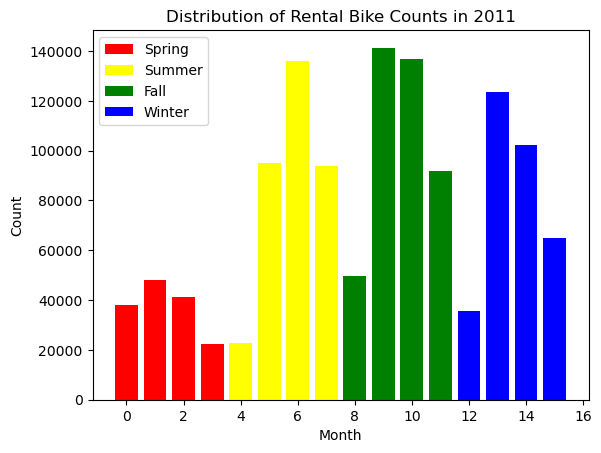

In [126]:
# Group the data by season and month, and sum the count column
grouped = df_2011.groupby(['season', 'mnth'], as_index=False).sum()[['season', 'mnth', 'cnt']]

# Plot the distribution of rental bike counts for 2011
fig, ax = plt.subplots()
for i, season in enumerate(['Spring', 'Summer', 'Fall', 'Winter']):
    season_data = grouped[grouped['season'] == i+1]['cnt']
    ax.bar(season_data.index, season_data.values, color=['red', 'yellow', 'green', 'blue'][i], label=season)
ax.set_title('Distribution of Rental Bike Counts in 2011')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.legend()
plt.show()

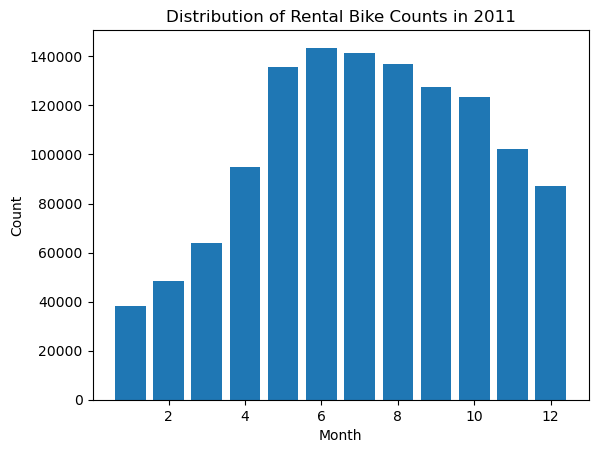

In [39]:
# Group the data by year and month, and sum the count column
grouped = df_2011.groupby(['mnth'], as_index=False).sum()[['mnth', 'cnt']]

# Plot the distribution of rental bike counts for 2011
fig, ax = plt.subplots()
ax.bar(grouped['mnth'], grouped['cnt'])
ax.set_title('Distribution of Rental Bike Counts in 2011')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
plt.show()

#### For the year 2012

#### a) Holiday wise monthly distribution of counts

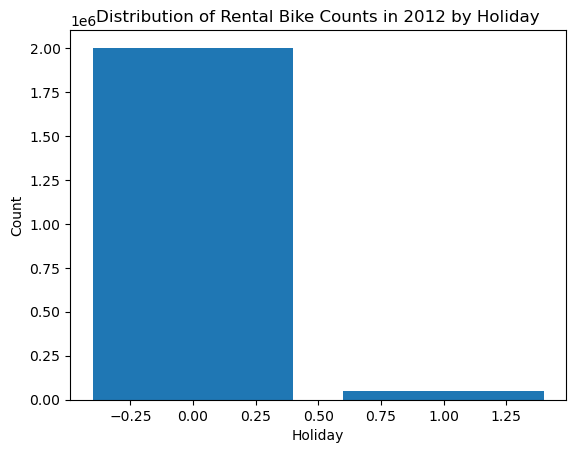

In [44]:
# Group the data by holiday, and sum the count column
grouped = df_2012.groupby(['holiday'], as_index=False).sum()[['holiday', 'cnt']]

# Plot the distribution of rental bike counts for 2012 by holiday
fig, ax = plt.subplots()
ax.bar(grouped['holiday'], grouped['cnt'])
ax.set_title('Distribution of Rental Bike Counts in 2012 by Holiday')
ax.set_xlabel('Holiday')
ax.set_ylabel('Count')
plt.show()

#### b) Yearly-wise distribution of counts

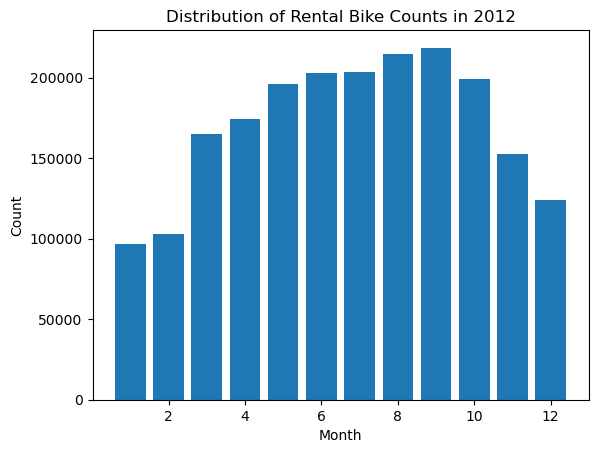

In [41]:
# Group the data by year and month, and sum the count column
grouped = df_2012.groupby(['mnth'], as_index=False).sum()[['mnth', 'cnt']]

# Plot the distribution of rental bike counts for 2011
fig, ax = plt.subplots()
ax.bar(grouped['mnth'], grouped['cnt'])
ax.set_title('Distribution of Rental Bike Counts in 2012')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
plt.show()

### Question 6

#### Plotting the Correlation between hourly/daily bike rental count and environmental settings, including weather, temperature, humidity and windspeed

Selecting the columns to be used for the analysis

In [45]:
columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df = df[columns]

Compute the pairwise correlation matrix

In [46]:
corr = df.corr()

Plot the correlation matrix using a heatmap

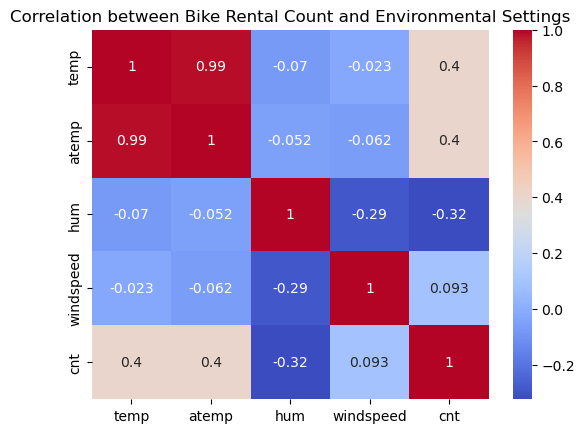

In [49]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Bike Rental Count and Environmental Settings')
plt.show()

The above correlation shows that the attributes atemp and temp have a very high positive correlation

### Question 7

#### Prediction of bike rental count hourly or daily based on the environmental and seasonal settings

Input Split

In [144]:
x = df.drop(columns = ['dteday','atemp','casual','registered','cnt'],axis=1)
y = df['cnt']

dropping atemp as it is highly correlated to temp, dropping casual and registered as their sum gives us count. So those two are extra columns.

Model Training

In [145]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [146]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [147]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 21378.34221572383
Model: Ridge()
CV score: 21369.597311434452
Model: HuberRegressor()
CV score: 26498.41793214878
Model: ElasticNetCV()
CV score: 30840.57941343619
Model: DecisionTreeRegressor()
CV score: 7214.327218352361
Model: RandomForestRegressor()
CV score: 4704.841407142097
Model: ExtraTreesRegressor()
CV score: 3961.143140853842
Model: GradientBoostingRegressor()
CV score: 6858.555591827008


In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Using random forest regressor

In [149]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Plot the error difference

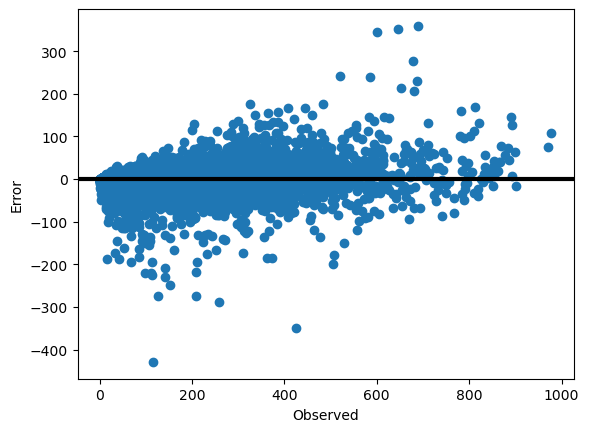

In [150]:
# plot the error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()
